In [100]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure


# Experimentos


#### Generando Data frame

In [101]:
df_concurrente_con_rep_102400 = pd.read_csv("output_concurrente/salida-conRepetidos-102400.txt.csv");
df_concurrente_con_rep_204800 = pd.read_csv("output_concurrente/salida-conRepetidos-204800.txt.csv");
df_concurrente_con_rep_409600 = pd.read_csv("output_concurrente/salida-conRepetidos-409600.txt.csv");

df_secuencial_con_rep_102400 = pd.read_csv("output_secuencial/salida-conRepetidos-102400.txt.csv");
df_secuencial_con_rep_204800 = pd.read_csv("output_secuencial/salida-conRepetidos-204800.txt.csv");
df_secuencial_con_rep_409600 = pd.read_csv("output_secuencial/salida-conRepetidos-409600.txt.csv");

#Agregando columna de metodos
metodo_maximo = []
metodo_maximo_paralelo = []
for i in range(0,26):
    metodo_maximo.append('max')
    metodo_maximo_paralelo.append('max_par')
#Agregando columna de tamaños
tamaño1 = []
tamaño2 = []
tamaño3 = []
for i in range(0,26):
    tamaño1.append('102400')
    tamaño2.append('204800')
    tamaño3.append('409600')



df_concurrente_con_rep_102400['metodo'] = metodo_maximo_paralelo
df_concurrente_con_rep_102400['size'] = tamaño1
df_concurrente_con_rep_204800['metodo'] = metodo_maximo_paralelo
df_concurrente_con_rep_204800['size'] = tamaño2
df_concurrente_con_rep_409600['metodo'] = metodo_maximo_paralelo
df_concurrente_con_rep_409600['size'] = tamaño3
df_secuencial_con_rep_102400['metodo'] = metodo_maximo
df_secuencial_con_rep_102400['size'] = tamaño1
df_secuencial_con_rep_204800['metodo'] = metodo_maximo
df_secuencial_con_rep_204800['size'] = tamaño2
df_secuencial_con_rep_409600['metodo'] = metodo_maximo
df_secuencial_con_rep_409600['size'] = tamaño3
print(df_concurrente_con_rep_102400)
print(df_secuencial_con_rep_102400)

    threads_lectura  thread_maximo  tiempo_mediana           output   metodo  \
0                 1              1         1.03973  ag5xVfE7PXYL=19  max_par   
1                 1              2         1.09170  ag5xVfE7PXYL=19  max_par   
2                 1              3         1.09112  ag5xVfE7PXYL=19  max_par   
3                 1              4         1.19216  ag5xVfE7PXYL=19  max_par   
4                 1              5         1.26594  ag5xVfE7PXYL=19  max_par   
5                 1              6         1.34399  ag5xVfE7PXYL=19  max_par   
6                 1              7         1.34013  ag5xVfE7PXYL=19  max_par   
7                 1              8         1.34479  ag5xVfE7PXYL=19  max_par   
8                 1              9         1.40929  ag5xVfE7PXYL=19  max_par   
9                 1             10         1.40953  ag5xVfE7PXYL=19  max_par   
10                1             11         1.50232  ag5xVfE7PXYL=19  max_par   
11                1             12      

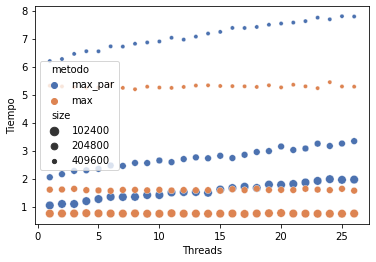

In [119]:
df_comparciones = pd.concat([df_concurrente_con_rep_102400, df_secuencial_con_rep_102400,df_concurrente_con_rep_204800,df_secuencial_con_rep_204800,df_concurrente_con_rep_409600,df_secuencial_con_rep_409600])
fig = sns.scatterplot(data=df_comparciones, x='thread_maximo', y='tiempo_mediana',palette="deep", hue='metodo',size="size");
fig.set(xlabel='Threads', ylabel='Tiempo');
plt.savefig("102400.svg");

### Experimento 1: Maximo Concurrente vs Maximo Secuencial

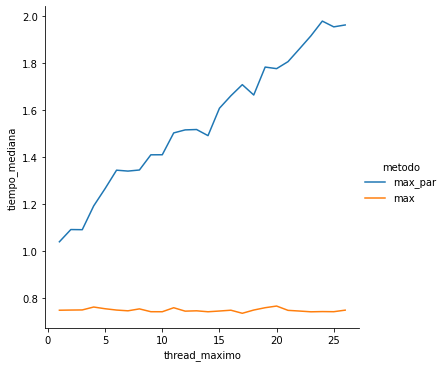

In [122]:
df_102400 = pd.concat([df_concurrente_con_rep_102400, df_secuencial_con_rep_102400], axis=0)
sns.relplot(data=df_102400 ,x="thread_maximo", y="tiempo_mediana",hue="metodo", kind="line")
plt.show()

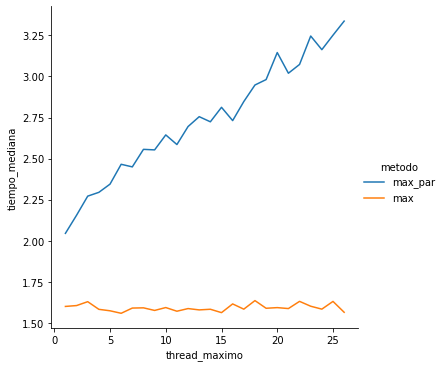

In [121]:
df_204800 = pd.concat([df_concurrente_con_rep_204800, df_secuencial_con_rep_204800], axis=0)
sns.relplot(data=df_204800 ,x="thread_maximo", y="tiempo_mediana", kind="line",hue="metodo")
plt.show()

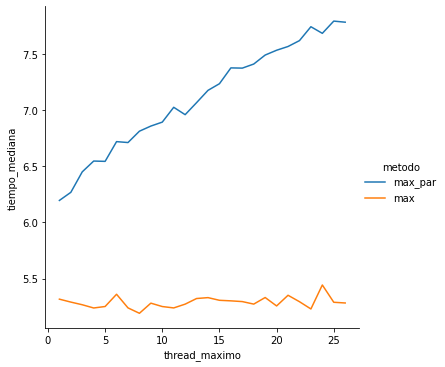

In [123]:
df_409600 = pd.concat([df_concurrente_con_rep_409600, df_secuencial_con_rep_409600], axis=0)
sns.relplot(data=df_409600 ,x="thread_maximo", y="tiempo_mediana", kind="line",hue="metodo")
plt.show()

### Experimento 2: CargadeArchivosParalelo vs CargaDeArchivos Secuencial